**Part-1 (Binary Classification):**

In [0]:
#1.1 Data Munging (3 Marks)
#a)Read the training and testing data. Print the number of features in the dataset.

import pandas as pd
import matplotlib.pyplot as plt

training_data = pd.read_csv('train_wbcd.csv')
print("Training Data shape: {}".format(training_data.shape))
#print(training_data.head())

testing_data = pd.read_csv('test_wbcd.csv')
print("Testing Data shape: {}".format(testing_data.shape))
#print(testing_data.head())

print('')
print("""The training and testing datasets contain 32 columns 
 * 30 feature columns f1 to f30
 * 1 Diagnosis/label column Diagnosis 
 * 1 patient identifier column Patient_ID  """)

Training Data shape: (100, 32)
Testing Data shape: (20, 32)

The training and testing datasets contain 32 columns 
 * 30 feature columns f1 to f30
 * 1 Diagnosis/label column Diagnosis 
 * 1 patient identifier column Patient_ID  


The count on Bs and Ms in training data
B    58
M    42
Name: Diagnosis, dtype: int64

The count on Bs and Ms in testing data
B    14
M     6
Name: Diagnosis, dtype: int64

The class distibution is unbalanced, The number of B's in training and testing datasets are 
higher than number of M's


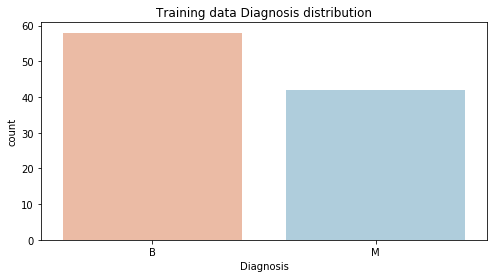

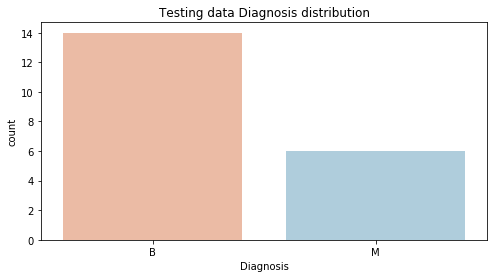

In [0]:
#b) For the data label, print the total number of B's and M's in the training and testing data. 
import seaborn as sns

print('The count on B''s and M''s in training data')
print(training_data['Diagnosis'].value_counts())
print('')
print('The count on B''s and M''s in testing data')
print(testing_data['Diagnosis'].value_counts())
print('')

plt.figure(figsize=(8, 4))
sns.countplot(training_data['Diagnosis'], palette='RdBu')
plt.title('Training data Diagnosis distribution')
plt.figure(figsize=(8, 4))
sns.countplot(testing_data['Diagnosis'], palette='RdBu')
plt.title('Testing data Diagnosis distribution')

#Comment on the class distribution. Is it balanced or unbalanced? 
print("""The class distibution is unbalanced, The number of B\'s in training and testing datasets are 
higher than number of M\'s""")

In [0]:
#c) Print the number of features with missing entries (feature value is zero). 
print('The number of feature columns that have a null value for feature value in training dataset')
print((training_data.iloc[:,2:32]).isnull().any().value_counts())
#print(training_data.iloc[:,2:32]).isnull().sum()
print('The number of feature columns that have a zero value for feature value in training dataset')
print ((training_data.iloc[:,2:32]== 0).any().value_counts())
#print(training_data.iloc[:,2:32]== 0).sum()
print('The number of feature columns that have a null value for feature value in testing dataset')
print((testing_data.iloc[:,2:32]).isnull().any().value_counts())
#print(testing_data.iloc[:,2:32]).isnull().sum()
print('The number of feature columns that have a zero value for feature value in testing dataset')
print((testing_data.iloc[:,2:32]== 0).any().value_counts())
#print(testing_data.iloc[:,2:32]== 0).sum()

print('')
print('Columns with Null values in training dataset :',training_data.columns[training_data.isnull().any()].tolist() )
print('Columns with zeros in training dataset :',training_data.columns[(training_data==0).any()].tolist())
print('Columns with Null values in testing dataset :',testing_data.columns[training_data.isnull().any()].tolist())
print('Columns with zeros in testing dataset :',testing_data.columns[(training_data==0).any()].tolist())


print('')
print('In Training dataset Column f21 has 2 null values and columns f7,f8,f17,f18,f27,f28 have 6 0\'s')
print('In Testing dataset Column f21 has 1 null value and columns f7,f8,f17,f18,f27,f28 have 1 0\'s')

The number of feature columns that have a null value for feature value in training dataset
False    29
True      1
dtype: int64
The number of feature columns that have a zero value for feature value in training dataset
False    24
True      6
dtype: int64
The number of feature columns that have a null value for feature value in testing dataset
False    29
True      1
dtype: int64
The number of feature columns that have a zero value for feature value in testing dataset
False    24
True      6
dtype: int64

Columns with Null values in training dataset : ['f21']
Columns with zeros in training dataset : ['f7', 'f8', 'f17', 'f18', 'f27', 'f28']
Columns with Null values in testing dataset : ['f21']
Columns with zeros in testing dataset : ['f7', 'f8', 'f17', 'f18', 'f27', 'f28']

In Training dataset Column f21 has 2 null values and columns f7,f8,f17,f18,f27,f28 have 6 0's
In Testing dataset Column f21 has 1 null value and columns f7,f8,f17,f18,f27,f28 have 1 0's


Histograms for features with 0 or null values in training dataset
---------------------------------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A40E7A0E80>,
      dtype=object)

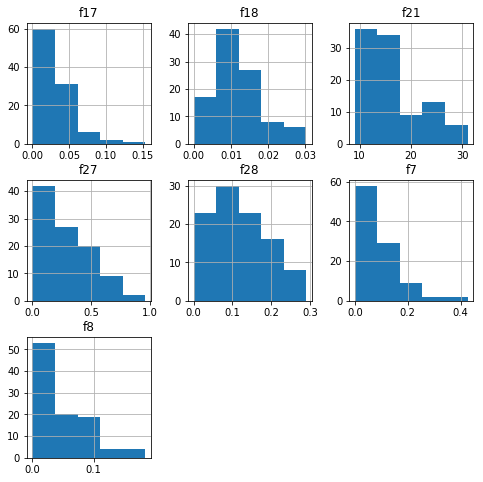

In [0]:
print('Histograms for features with 0 or null values in training dataset')
print('---------------------------------------------')
training_data.hist(column = ['f21','f7','f8','f17','f18','f27','f28'] , figsize=(8,8),bins=5)


Histograms for features with 0 or null values in testing dataset
---------------------------------------------


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A411D41EF0>,
      dtype=object)

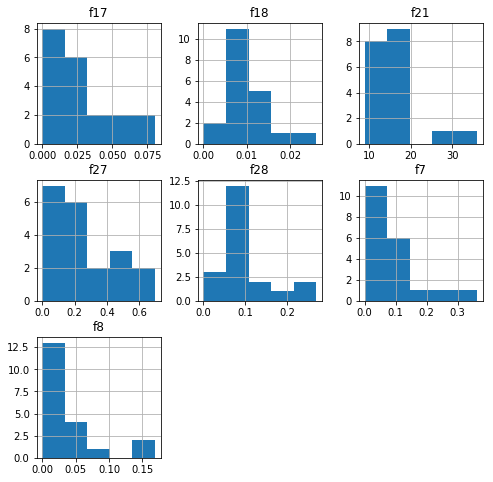

In [0]:
print('')
print('Histograms for features with 0 or null values in testing dataset')
print('---------------------------------------------')
testing_data.hist(column = ['f21','f7','f8','f17','f18','f27','f28'] , figsize=(8,8),bins=5)

In [0]:
print("""Columns f18 and f28 are somewhat normally distributed, rest of the columns are skewed in both training and 
testing datasets.This is why, we will replace the missing values with mean for columns f18 and f28.
We will use median for the remaining columns""")

Columns f18 and f28 are somewhat normally distributed, rest of the columns are skewed in both training and 
testing datasets.This is why, we will replace the missing values with mean for columns f18 and f28.
We will use median for the remaining columns


In [0]:
#d) Fill the missing entries. For filling any feature, you can use either mean or median value of the feature 
#values from observed entries.
#training dataset
training_data['f18']=training_data['f18'].replace(0,training_data['f18'].mean())
training_data['f28']=training_data['f28'].replace(0,training_data['f28'].mean())
training_data['f8']=training_data['f8'].replace(0,training_data['f8'].median())
training_data['f7']=training_data['f7'].replace(0,training_data['f7'].median())
training_data['f17']=training_data['f17'].replace(0,training_data['f17'].median())
training_data['f27']=training_data['f27'].replace(0,training_data['f27'].median())
training_data['f21']=training_data['f21'].fillna((training_data['f21'].median()))

#testing dataset
testing_data['f18']=testing_data['f18'].replace(0,testing_data['f18'].mean())
testing_data['f28']=testing_data['f28'].replace(0,testing_data['f28'].mean())
testing_data['f8']=testing_data['f8'].replace(0,testing_data['f8'].median())
testing_data['f7']=testing_data['f7'].replace(0,testing_data['f7'].median())
testing_data['f17']=testing_data['f17'].replace(0,testing_data['f17'].median())
testing_data['f27']=testing_data['f27'].replace(0,testing_data['f27'].median())
testing_data['f21']=testing_data['f21'].fillna((testing_data['f21'].median()))

** Question d-  Explain the reason behind your choice.

Columns f18 and f28 are somewhat normally distributed, rest of the columns all are skewed.
This is why, we will replace the missing values with mean for columns f18 and f28.
We will use median for the remaining columns

In [0]:
#e) Normalize the training and testing data and create new normalized dataframe for features columns
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(training_data.iloc[:,2:32])
#training_data_normalized = pd.DataFrame(np_scaled)
training_data.iloc[:,2:32] = min_max_scaler.fit_transform(training_data.iloc[:,2:32])

min_max_scaler = preprocessing.MinMaxScaler()
#np_scaled = min_max_scaler.fit_transform(testing_data.iloc[:,2:32])
#testing_data_normalized = pd.DataFrame(np_scaled)
testing_data.iloc[:,2:32] = min_max_scaler.fit_transform(testing_data.iloc[:,2:32])

training_data['Diagnosis']=training_data['Diagnosis'].map({'M':1,'B':0})
testing_data['Diagnosis']=testing_data['Diagnosis'].map({'M':1,'B':0})

In [0]:
#Create feature and label datasets for running supervised learning algorithms
#Labels M and B are categorical variables and they will be converted to numerical variables by mapping M to 1 and B to 0
Feature_training_data=training_data.iloc[:,2:32].copy()
Feature_testing_data=testing_data.iloc[:,2:32].copy()
labels_training_data=training_data['Diagnosis'].copy()
labels_testing_data=testing_data['Diagnosis'].copy()

In [0]:
#1.2 Logistic Regression
#Train logistic regression models with L1 regularization and L2 regularization using alpha = 0.1 and lambda = 0.1.
#Report accuracy, precision, recall, f1-score and print the confusion matrix.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#L1 Regularization/Lasso Regression
lambda_l1=0.1
logreg_L1 = LogisticRegression(penalty='l1',C=1/lambda_l1)
logreg_L1.fit(Feature_training_data,labels_training_data)
L1_labels_prediction_data = logreg_L1.predict(Feature_testing_data)

#Evaluate L1 regularization model
print('---------------------------------------------------')
print('Performance of L1 regularization model')
print('---------------------------------------------------')
print('Accuracy of Logistic Regression model with L1 regularization with alpha value 0.1 is : '+ str(accuracy_score(labels_testing_data,L1_labels_prediction_data)))
print('')

print('We have mapped M as 1 and B as 0, Precision, recall and f1 score are as below')
target_names = ['B', 'M']
print(classification_report(labels_testing_data,L1_labels_prediction_data,digits=3,target_names=target_names))

L1_confusion_matrix = confusion_matrix(labels_testing_data,L1_labels_prediction_data)
print('Here is the confusion matrix')
print('----------------------------')
print(L1_confusion_matrix)
print('')

#L2 Regularization/Ridge Regression
lambda_l2=0.1
logreg_L2 = LogisticRegression(penalty='l2',C=1/lambda_l2)
logreg_L2.fit(Feature_training_data,labels_training_data)
L2_labels_prediction_data = logreg_L2.predict(Feature_testing_data)

print('---------------------------------------------------')
print('Performance of L2 regularization model')
print('---------------------------------------------------')
#Evaluate L2 regularization model
print('Accuracy of Logistic Regression model with L2 regularization with lambda value 0.1 is : '+ str(accuracy_score(labels_testing_data,L2_labels_prediction_data)))
print('')

print('We have mapped M as 1 and B as 0, Precision, recall and f1 score are as below')
target_names = ['B', 'M']
print(classification_report(labels_testing_data,L2_labels_prediction_data,digits=3,target_names=target_names))

L2_confusion_matrix = confusion_matrix(labels_testing_data,L2_labels_prediction_data)
print('Here is the confusion matrix')
print('----------------------------')
print(L2_confusion_matrix)

---------------------------------------------------
Performance of L1 regularization model
---------------------------------------------------
Accuracy of Logistic Regression model with L1 regularization with alpha value 0.1 is : 0.9

We have mapped M as 1 and B as 0, Precision, recall and f1 score are as below
              precision    recall  f1-score   support

           B      0.875     1.000     0.933        14
           M      1.000     0.667     0.800         6

   micro avg      0.900     0.900     0.900        20
   macro avg      0.938     0.833     0.867        20
weighted avg      0.912     0.900     0.893        20

Here is the confusion matrix
----------------------------
[[14  0]
 [ 2  4]]

---------------------------------------------------
Performance of L2 regularization model
---------------------------------------------------
Accuracy of Logistic Regression model with L2 regularization with lambda value 0.1 is : 0.95

We have mapped M as 1 and B as 0, Precision, 

In [0]:
#1.3 Choosing the best hyper-parameter
# We will define a function that will split the training dataset into 70% training set and 30% testing set and then 
#run logistic regression based on the input penalty and lambda value

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
# import warnings filter
import warnings
warnings.filterwarnings("ignore")


def runLRmodel(trials, data, penalty_type, penalty_score):

   model_acc     = 0
   model_weights = np.zeros([1,3])
   final_f1score = np.zeros([1, 2]) # storing model weights
    
   for i in range(0,trials):
       Dtrain, Dtest = train_test_split(data, test_size=0.3)
       Xtrain = Dtrain.iloc[:,2:32].copy()
       ytrain = Dtrain.iloc[:,1].copy()
       Xtest = Dtest.iloc[:,2:32].copy()
       ytest = Dtest.iloc[:,1].copy()
    
       lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type)
       lr.fit(Xtrain, ytrain)
       y_predict = lr.predict(Xtest)
       f1score=f1_score(ytest, y_predict, average='weighted')
       final_f1score  +=  f1score
   final_f1score /= trials
   return np.round(final_f1score, decimals=2)

In [0]:
#For L1 model, choose the best alpha value from the following set: {0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333} 
#based on parameter P.
# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


print('We are going to use P as f1-score since fID=',218545396%3)

alpha_vals = [0.1,1,3,10,33,100,333,1000, 3333, 10000, 33333]
l1_acc = np.zeros((len(alpha_vals),2))
index = 0

#L1 regularization
for l in alpha_vals:
   l1_acc[index] = runLRmodel(10,training_data, 'l1', np.float(l))
   print('For alpha value :', l,'we got an average f1-score of:', l1_acc[index,0])
   index += 1
   
#print("F1 score: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("")
print("""We have performed 10 random splits of training data into training (70%) and validation (30%) set.
We then used these 10 sets of data to find the average validation performance P which is the f1 score in our case.
Best Alpha for L1 regularization that gave maximum F1 score is: {}""".format(best_alpha))

We are going to use P as f1-score since fID= 1
For alpha value : 0.1 we got an average f1-score of: 0.98
For alpha value : 1 we got an average f1-score of: 0.96
For alpha value : 3 we got an average f1-score of: 0.9
For alpha value : 10 we got an average f1-score of: 0.37
For alpha value : 33 we got an average f1-score of: 0.44
For alpha value : 100 we got an average f1-score of: 0.43
For alpha value : 333 we got an average f1-score of: 0.42
For alpha value : 1000 we got an average f1-score of: 0.43
For alpha value : 3333 we got an average f1-score of: 0.43
For alpha value : 10000 we got an average f1-score of: 0.4
For alpha value : 33333 we got an average f1-score of: 0.45

We have performed 10 random splits of training data into training (70%) and validation (30%) set.
We then used these 10 sets of data to find the average validation performance P which is the f1 score in our case.
Best Alpha for L1 regularization that gave maximum F1 score is: 0.1


In [0]:
#For L2 model, choose the best lambda value from the following set: {0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33} 
#based on parameter P. 
# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

print('We are going to use P as f1-score since fID=',218545396%3)

lambda_vals = [0.001, 0.003, 0.01, 0.03, 0.1,0.3,1,3,10,33]
l2_acc = np.zeros((len(lambda_vals),2))
index = 0

#L2 regularization
for l in lambda_vals:
   l2_acc[index] = runLRmodel(10,training_data, 'l2', np.float(l))
   print('For lambda value :', l,'we got an average f1-score of:', l2_acc[index,0])
   index += 1
   
#print("F1 score: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("")
print("""We have performed 10 random splits of training data into training (70%) and validation (30%) set.
We then used these 10 sets of data to find the average validation performance P which is the f1 score in our case.
Best Lambda for L2 regularization that gave maximum F1 score is: {}""".format(best_lambda))

We are going to use P as f1-score since fID= 1
For lambda value : 0.001 we got an average f1-score of: 0.99
For lambda value : 0.003 we got an average f1-score of: 0.98
For lambda value : 0.01 we got an average f1-score of: 0.97
For lambda value : 0.03 we got an average f1-score of: 0.98
For lambda value : 0.1 we got an average f1-score of: 0.95
For lambda value : 0.3 we got an average f1-score of: 0.97
For lambda value : 1 we got an average f1-score of: 0.93
For lambda value : 3 we got an average f1-score of: 0.94
For lambda value : 10 we got an average f1-score of: 0.92
For lambda value : 33 we got an average f1-score of: 0.86

We have performed 10 random splits of training data into training (70%) and validation (30%) set.
We then used these 10 sets of data to find the average validation performance P which is the f1 score in our case.
Best Lambda for L2 regularization that gave maximum F1 score is: 0.001


In [0]:
#1.3c) Use the best alpha and lambda parameter to re-train your final L1 and L2 regularized model. 
#Evaluate the prediction performance on the test data and report the following:
#Precision and Accuracy 
#The top 5 features selected in decreasing order of feature weights. 
#Confusion matrix 
# import warnings filter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


#L1 Regularization/Lasso Regression
lambda_l1=0.1
logreg_L1 = LogisticRegression(penalty='l1',C=1/lambda_l1)
logreg_L1.fit(Feature_training_data,labels_training_data)
L1_labels_prediction_data = logreg_L1.predict(Feature_testing_data)

#Evaluate L1 regularization model
print('---------------------------------------------------')
print('Performance of L1 regularization model')
print('---------------------------------------------------')
print('Accuracy of Logistic Regression model with L1 regularization with alpha value 0.1 is : '+ str(accuracy_score(labels_testing_data,L1_labels_prediction_data)))
print('')

print('We have mapped M as 1 and B as 0, Precision, recall and f1 score are as below')
target_names = ['B', 'M']
print(classification_report(labels_testing_data,L1_labels_prediction_data,digits=3,target_names=target_names))

#The top 5 features selected in decreasing order of feature weights. 
logReg_coeff_L1 = pd.DataFrame({'feature_name': Feature_training_data.columns, 'model_coefficient': logreg_L1.coef_.transpose().flatten()})
logReg_coeff_L1 = logReg_coeff_L1.sort_values('model_coefficient',ascending=False)
logReg_coeff_L1_top = logReg_coeff_L1.head(5)

print('The top 5 features in decreasing order of feature weights for L1 reularization are:')
print(logReg_coeff_L1_top)
print('')

L1_confusion_matrix = confusion_matrix(labels_testing_data,L1_labels_prediction_data)
print('Here is the confusion matrix for L1 regularization')
print('--------------------------------------------------')
print(L1_confusion_matrix)
print('')

#L2 Regularization/Ridge Regression
lambda_l2=0.001
logreg_L2 = LogisticRegression(penalty='l2',C=1/lambda_l2)
logreg_L2.fit(Feature_training_data,labels_training_data)
L2_labels_prediction_data = logreg_L2.predict(Feature_testing_data)

print('---------------------------------------------------')
print('Performance of L2 regularization model')
print('---------------------------------------------------')
#Evaluate L2 regularization model
print('Accuracy of Logistic Regression model with L2 regularization with lambda value 0.001 is : '+ str(accuracy_score(labels_testing_data,L2_labels_prediction_data)))
print('')

print('We have mapped M as 1 and B as 0, Precision, recall and f1 score are as below')
target_names = ['B', 'M']
print(classification_report(labels_testing_data,L2_labels_prediction_data,digits=3,target_names=target_names))

#The top 5 features selected in decreasing order of feature weights. 
logReg_coeff_L2 = pd.DataFrame({'feature_name': Feature_training_data.columns, 'model_coefficient': logreg_L2.coef_.transpose().flatten()})
logReg_coeff_L2 = logReg_coeff_L2.sort_values('model_coefficient',ascending=False)
logReg_coeff_L2_top = logReg_coeff_L2.head(5)

print('The top 5 features in decreasing order of feature weights for L2 reularization are:')
print(logReg_coeff_L2_top)
print('')

L2_confusion_matrix = confusion_matrix(labels_testing_data,L2_labels_prediction_data)
print('Here is the confusion matrix for L2 regularization')
print('--------------------------------------------------')
print(L2_confusion_matrix)

#reference:
#https://sweetcode.io/easy-scikit-logistic-regression/

---------------------------------------------------
Performance of L1 regularization model
---------------------------------------------------
Accuracy of Logistic Regression model with L1 regularization with alpha value 0.1 is : 0.9

We have mapped M as 1 and B as 0, Precision, recall and f1 score are as below
              precision    recall  f1-score   support

           B      0.875     1.000     0.933        14
           M      1.000     0.667     0.800         6

   micro avg      0.900     0.900     0.900        20
   macro avg      0.938     0.833     0.867        20
weighted avg      0.912     0.900     0.893        20

The top 5 features in decreasing order of feature weights for L1 reularization are:
   feature_name  model_coefficient
22          f23          16.071345
21          f22           9.775681
20          f21           7.941061
24          f25           4.721608
29          f30           3.399388

Here is the confusion matrix for L1 regularization
--------------